In [1]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook

In [2]:
# universet hedder nu dolf
kvec = [1e-1,1,1e1]
uni = Class() # "H0":67.7
h = 0.6704
uni.set({"gauge":"sync",
          "h":h,
         "Omega_b":0.07,"Omega_cdm":0.252, 
          'k_output_values':str(kvec).strip('[]'),
          "z_pk":'1000.0, 0.0',
          'output':'tCl, dTk, vTk'})

#
#"N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
# , lCl, pCl','lensing':'yes
#'output':'tCl, dTk, vTk',"modes":"s" })
#  , lCl, pCl', 
uni.compute()

bg = uni.get_background()
da = 3
pb = uni.get_perturbations()["scalar"]

# pk = uni.get_pk() ? 
# params = uni.get_current_derived_parameters() ?
# help(Class.get_current_derived_parameters)


[1.00000000e-06 5.18317621e-06 2.68653156e-05 1.39247665e-04
 7.21745185e-04 3.74093247e-03 1.93899122e-02 1.00501332e-01
 5.20916112e-01 2.70000000e+00]


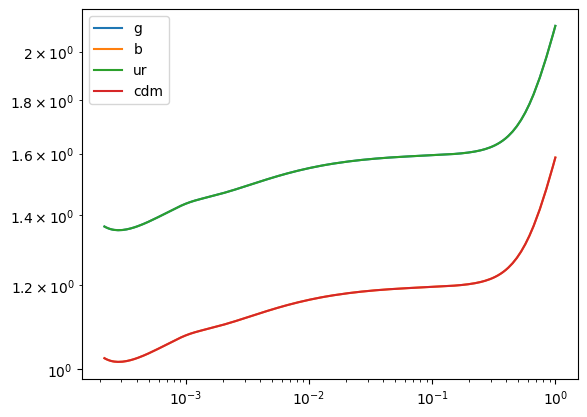

In [3]:
print(bg.keys())
z = bg["z"]
a = 1/(1+z)
tau = bg['conf. time [Mpc]']
D = bg['gr.fac. D']
f = bg['gr.fac. f']

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [4]:
pb0 = pb[0] # det er her man vælger k bølgetallet.
print(pb0.keys())
#plt.loglog(pb0['tau [Mpc]'],pb0["a"])

dict_keys(['tau [Mpc]', 'a', 'delta_g', 'theta_g', 'shear_g', 'pol0_g', 'pol1_g', 'pol2_g', 'delta_b', 'theta_b', 'psi', 'phi', 'delta_ur', 'theta_ur', 'shear_ur', 'delta_cdm', 'theta_cdm'])


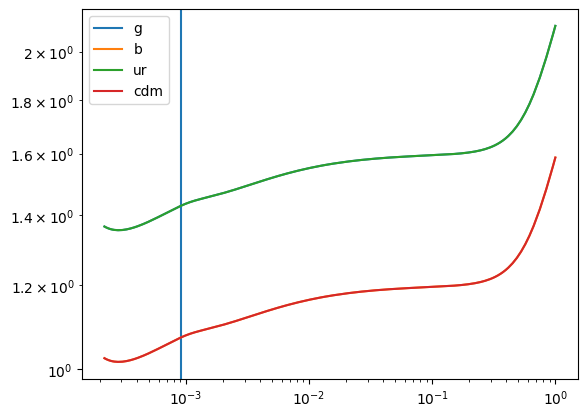

In [13]:
tau = pb0['tau [Mpc]']
a = pb0["a"]
plt.axvline(1/(1+1100))
value_list = ["g","b","ur","cdm"]#,"ncdm[0]"]

for species in value_list:
    #plt.figure(1)
    plt.loglog(a,-pb0["delta_"+species],label=species)
    
    #plt.figure(2)
    #plt.loglog(tau,pb0["theta_"+species])
#plt.loglog(a,pb0['cs2_ncdm[0]'],label="wack dark matter")
plt.legend()

plt.show()

In [6]:
tm = uni.get_thermodynamics()
print(tm.keys())

dict_keys(['scale factor a', 'z', 'conf. time [Mpc]', 'x_e', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


In [7]:
import scipy.interpolate

dict_keys(['k (h/Mpc)', 'd_g', 'd_b', 'd_cdm', 'd_ur', 'd_m', 'd_tot', 'phi', 'psi', 't_g', 't_b', 't_ur', 't_tot'])
k fra transfer har længden  564
k fra primordial har længden  63


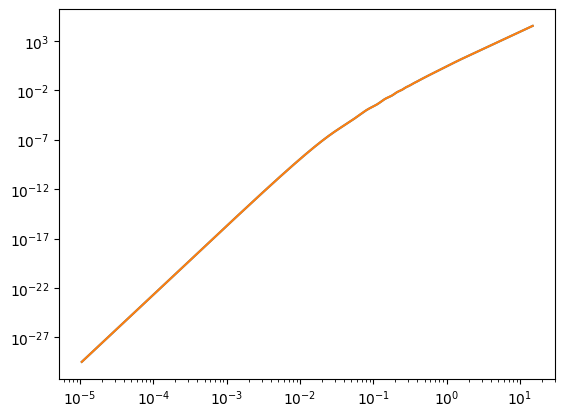

In [10]:
tranf = uni.get_transfer(z=0)
print(tranf.keys())
d_m = tranf["d_m"]
d_cdm = tranf["d_cdm"]
h = 0.68

k_tranf = tranf['k (h/Mpc)'] * h
print("k fra transfer har længden ", len(k_tranf))

prim = uni.get_primordial()['P_scalar(k)']
k_prim = uni.get_primordial()['k [1/Mpc]']
print("k fra primordial har længden ", len(k_prim))

# vi har det problem at tranf og primordial strækker
# sig over de samme k værdier men har forskellige længder
# det fikser vi her ved at intrepolere Prim
prim_interp =  scipy.interpolate.interp1d(k_prim, prim,kind="cubic")
prim_tranf = prim_interp(k_tranf)

k = tranf['k (h/Mpc)']
d_g = tranf["d_g"]
plt.loglog(k,d_m**2 * k **3 *prim_tranf)
plt.loglog(k,d_cdm**2 * k **3 *prim_tranf)

In [ ]:
kvec = np.logspace(1-6,10,20)
uni2 = Class() # "H0":67.7
h = 0.6704
dict_uni2 = {"gauge":"sync",
            "h":h,#"N_ur": 2.03351,"N_ncdm": 1,"m_ncdm": 10.06,
            #"Omega_b":0.07,"Omega_cdm":0.252, 
            'k_output_values':str(kvec).strip('[]'),
            #"z_pk":'1000.0, 0.0',
            'output':'pCl,lCl,mPk,tCl, dTk, vTk',
            "lensing":"yes"
           }
uni2.set(dict_uni2)
# , lCl, pCl','lensing':'yes
#'output':'tCl, dTk, vTk',"modes":"s" })
#  , lCl, pCl', 
uni2.compute()
bg = uni2.get_background()
da = 3
pb = uni2.get_perturbations()["scalar"]

In [ ]:
cls = uni2.lensed_cl(2500)
cls.keys()
clTT = cls["tt"]
l = cls["ell"]
# np.log
plt.plot((l),clTT * l * (l+1)/2/np.pi)
plt.xscale('log')
plt.xlim(2,2500)